In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biodiversity-in-national-parks-project/observations.csv
/kaggle/input/biodiversity-in-national-parks-project/species_info.csv


# Biodiversity in National Parks

## Introduction

This Jupyter Notebook is dedicated to analyzing the biodiversity within National Parks. The analysis focuses particularly on species observations and their conservation statuses. The goal is to highlight critical areas for conservation efforts and understand the distribution of various species within these protected areas.
The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.
---

## Setup and Environment Preparation

This section prepares the environment by loading necessary libraries and setting up the data paths.

### Import Libraries

```python
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scikit-learn.linear_model import LogisticRegression
from scikit-learn.model_selection import train_test_split
from scikit-learn.metrics import classification_report
```

## Loading the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents.

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [12]:
# Libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Load the observations data
observations = pd.read_csv('/kaggle/input/biodiversity-in-national-parks-project/observations.csv')

# Load the species info data
species_info = pd.read_csv('/kaggle/input/biodiversity-in-national-parks-project/species_info.csv')

# Display the first few rows of each DataFrame
print("Observations Data:")
print(observations.head())

print('\n')

print("\nSpecies Info Data:") 
print(species_info.head())

Observations Data:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85



Species Info Data:
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison            

In [13]:
species_info.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

#### Data Characteristics

Next, there will be a check for the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [14]:
# Check the shape of each DataFrame
print("Observations Shape:", observations.shape)
print("Species Info Shape:", species_info.shape)

print('\n')

# Check for missing values
print("\nMissing Values in Observations:")
print(observations.isnull().sum())

print('\n')

print("\nMissing Values in Species Info:")
print(species_info.isnull().sum())

print('\n')

# Check for duplicate rows
print("\nDuplicate Rows in Observations:", observations.duplicated().sum())
print("Duplicate Rows in Species Info:", species_info.duplicated().sum())

Observations Shape: (23296, 3)
Species Info Shape: (5824, 4)



Missing Values in Observations:
scientific_name    0
park_name          0
observations       0
dtype: int64



Missing Values in Species Info:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64



Duplicate Rows in Observations: 15
Duplicate Rows in Species Info: 0


In [15]:
#print(f"number of species:{species.scientific_name.nunique()}")

In [16]:
#observations.loc[observations.duplicated()]
#observations.loc[observations.scientific_name == 'Echinochloa crus-galli']
#observations = observations[~observations.duplicated()]
observations.drop_duplicates(inplace=True)

In [17]:
# Merge the DataFrames on the 'scientific_name' column
merged_df = pd.merge(observations, species_info, on='scientific_name', how='left')

# Save the merged DataFrame to a CSV file in the project directory
merged_df.to_csv('./merged_df.csv', index=False)

# Display the first few rows of the merged DataFrame
print("Merged Data:")
print(merged_df.head())

print('\n')

print(merged_df.columns.tolist())

Merged Data:
            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  


['sci

In [18]:
merged_df.groupby('park_name')['scientific_name'].value_counts()

park_name               scientific_name                    
Bryce National Park     Canis lupus                            9
                        Castor canadensis                      9
                        Columba livia                          9
                        Holcus lanatus                         9
                        Hypochaeris radicata                   9
                                                              ..
Yosemite National Park  Zonotrichia leucophrys gambelii        1
                        Zonotrichia leucophrys oriantha        1
                        Zonotrichia querula                    1
                        Zygodon viridissimus                   1
                        Zygodon viridissimus var. rupestris    1
Name: count, Length: 22164, dtype: int64

In [19]:
# Group by park_name and sum the observations
species_observations = merged_df.groupby(['park_name', 'conservation_status'])['observations'].sum()
species_status_count = merged_df.groupby(['park_name', 'conservation_status'])['scientific_name'].count()
print(species_observations)

# Get unique parks for iteration
unique_parks = merged_df['park_name'].unique()

park_name                            conservation_status
Bryce National Park                  Endangered               619
                                     In Recovery              388
                                     Species of Concern     17011
                                     Threatened               591
Great Smoky Mountains National Park  Endangered               393
                                     In Recovery              248
                                     Species of Concern     11735
                                     Threatened               440
Yellowstone National Park            Endangered              1558
                                     In Recovery              889
                                     Species of Concern     40677
                                     Threatened              1459
Yosemite National Park               Endangered               943
                                     In Recovery              582
                   

In [20]:
print(species_status_count)

park_name                            conservation_status
Bryce National Park                  Endangered              20
                                     In Recovery              6
                                     Species of Concern     183
                                     Threatened              11
Great Smoky Mountains National Park  Endangered              20
                                     In Recovery              6
                                     Species of Concern     183
                                     Threatened              11
Yellowstone National Park            Endangered              20
                                     In Recovery              6
                                     Species of Concern     183
                                     Threatened              11
Yosemite National Park               Endangered              20
                                     In Recovery              6
                                     Species of

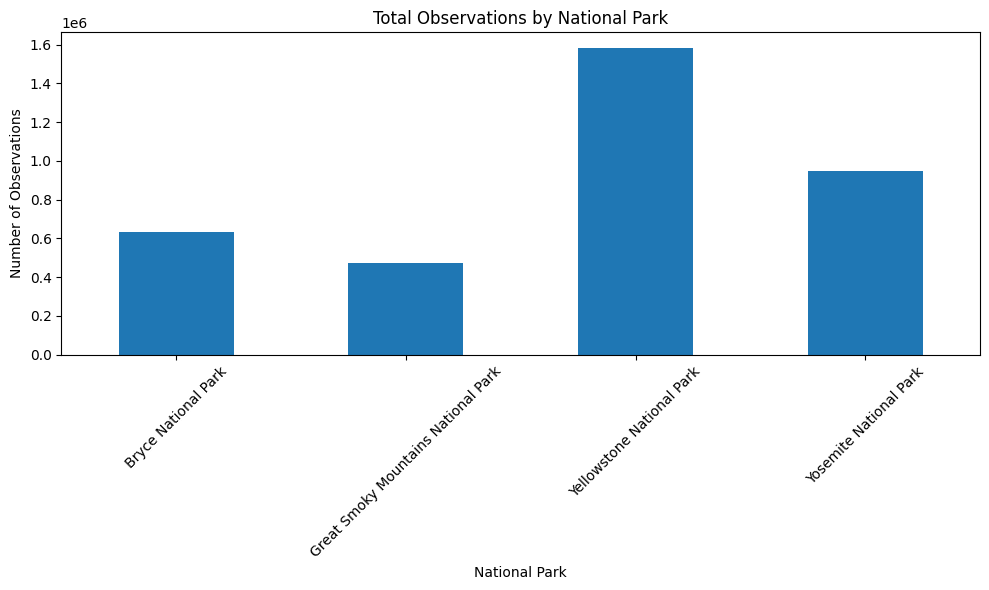

In [21]:
# Group by park_name and sum the observations
park_observations = merged_df.groupby('park_name')['observations'].sum()

# Create a bar plot of observations by park
plt.figure(figsize=(10, 6))
park_observations.plot(kind='bar')
plt.xlabel('National Park')
plt.ylabel('Number of Observations')
plt.title('Total Observations by National Park')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

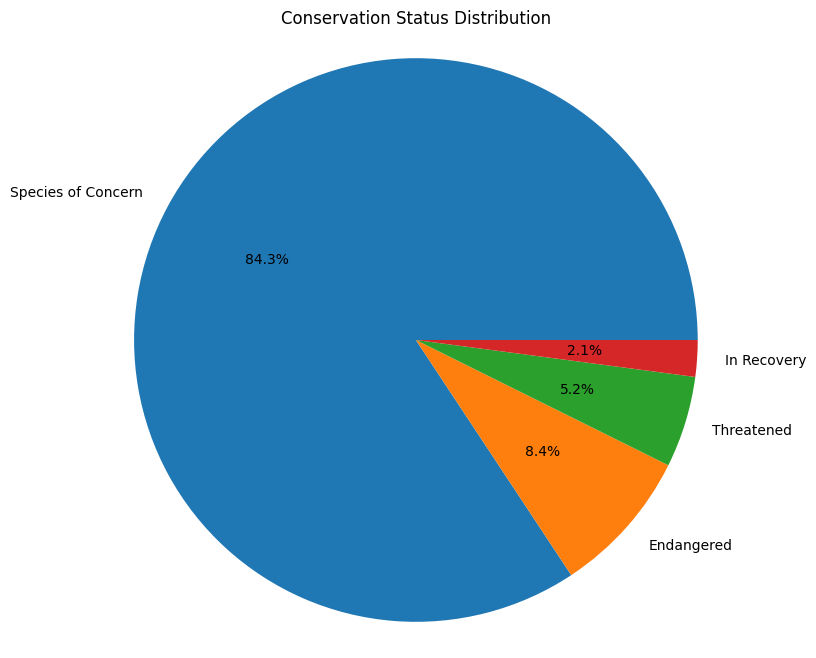

In [22]:
# Count the number of species in each conservation status category
conservation_counts = species_info['conservation_status'].value_counts()

# Create a pie chart of conservation status proportions
plt.figure(figsize=(8, 8))
plt.pie(conservation_counts, labels=conservation_counts.index, autopct='%1.1f%%')
plt.title('Conservation Status Distribution')
plt.axis('equal')
plt.show()

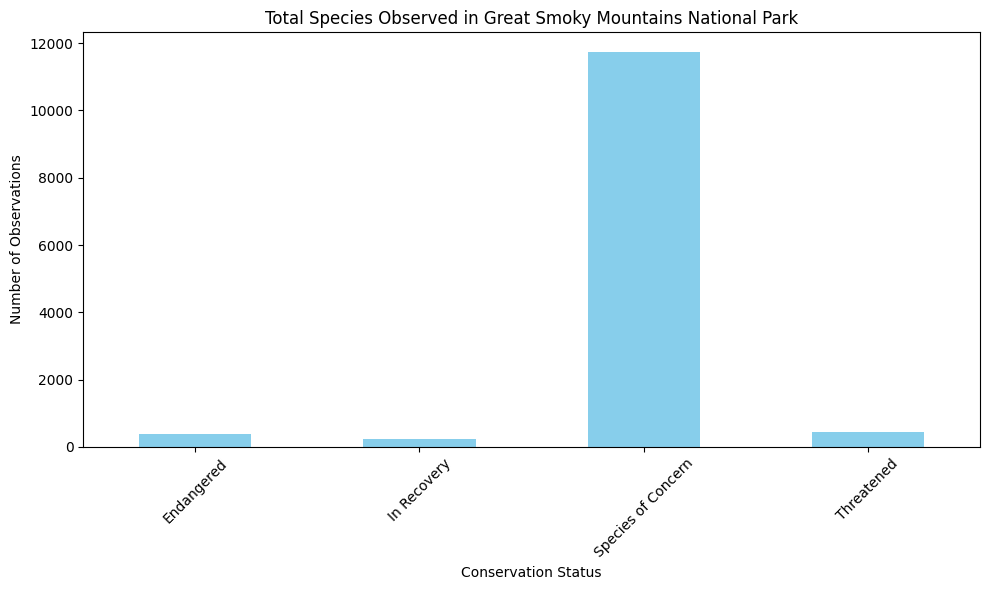

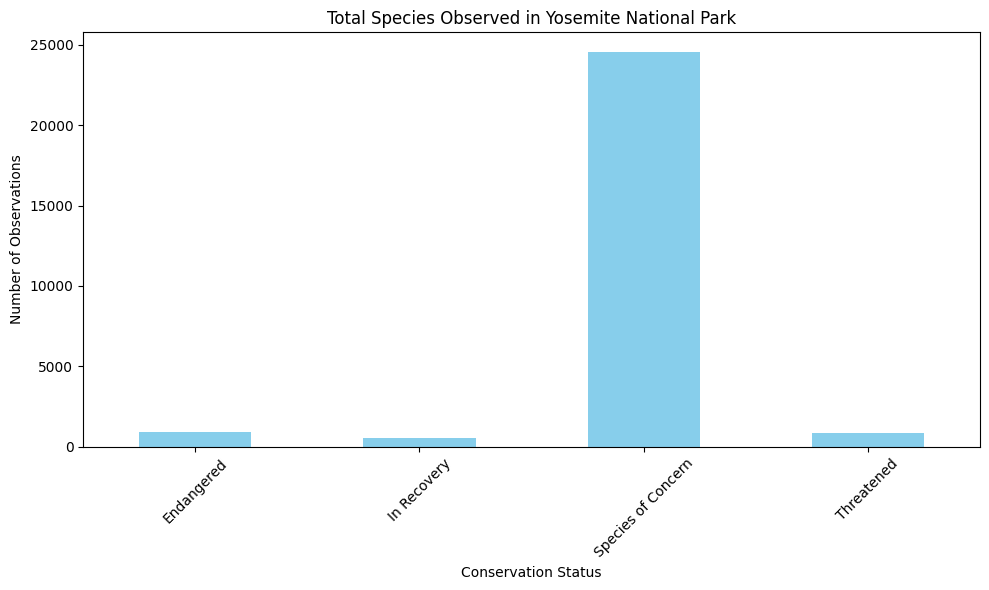

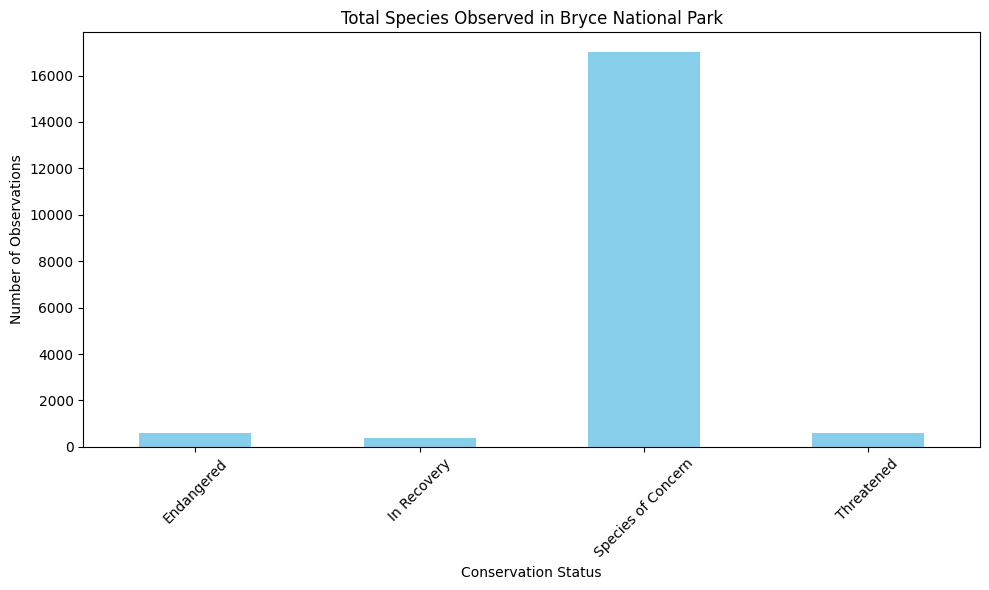

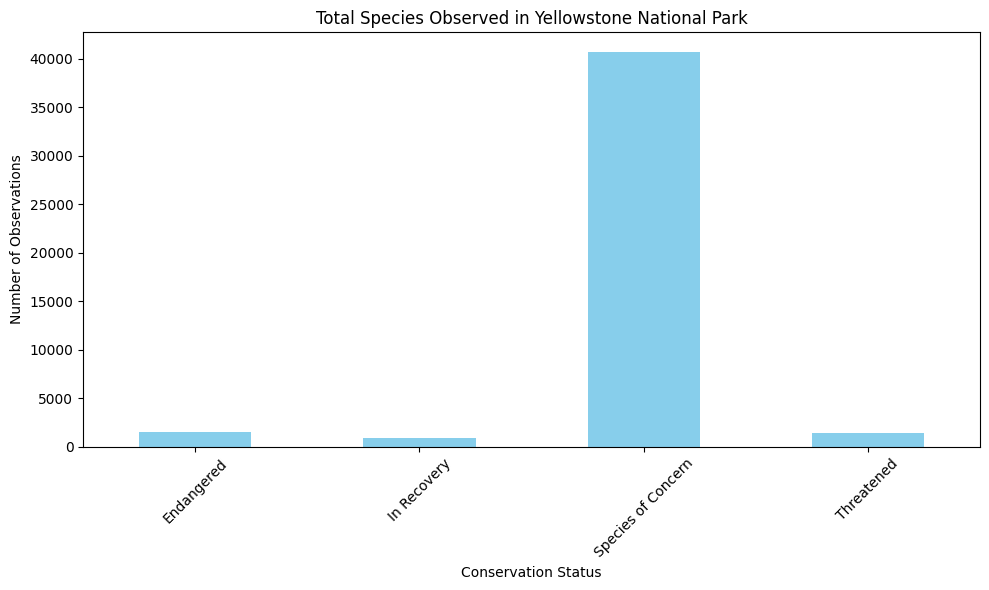

In [23]:
# Loop through each park and create a separate plot
for park in unique_parks:
    # Filter data for the current park
    park_data = species_observations.loc[park]

    # Create a plot for the current park
    plt.figure(figsize=(10, 6))
    park_data.plot(kind='bar', color='skyblue')  # Choose a color or remove this parameter
    plt.title(f'Total Species Observed in {park}')
    plt.xlabel('Conservation Status')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

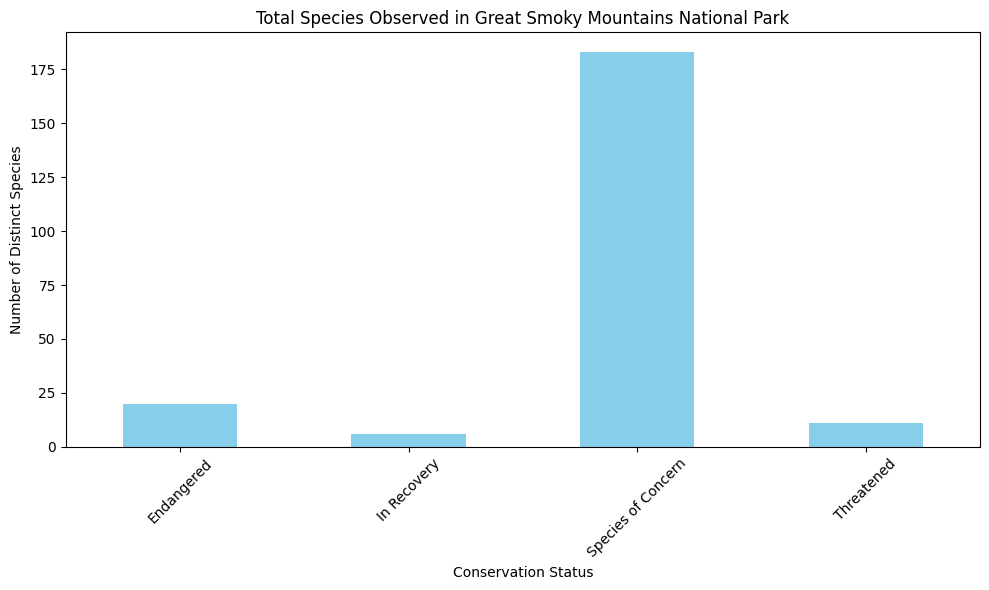

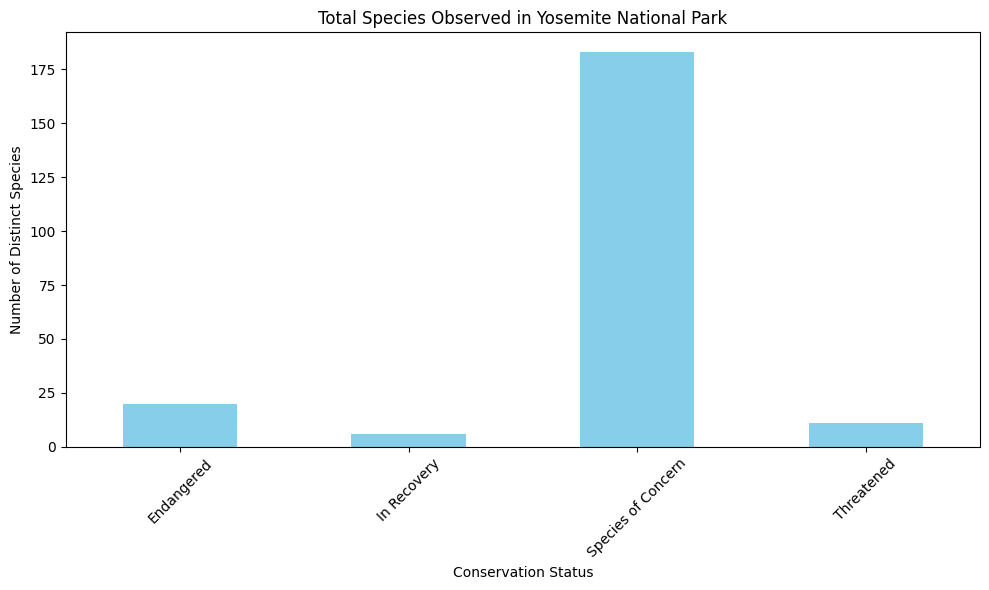

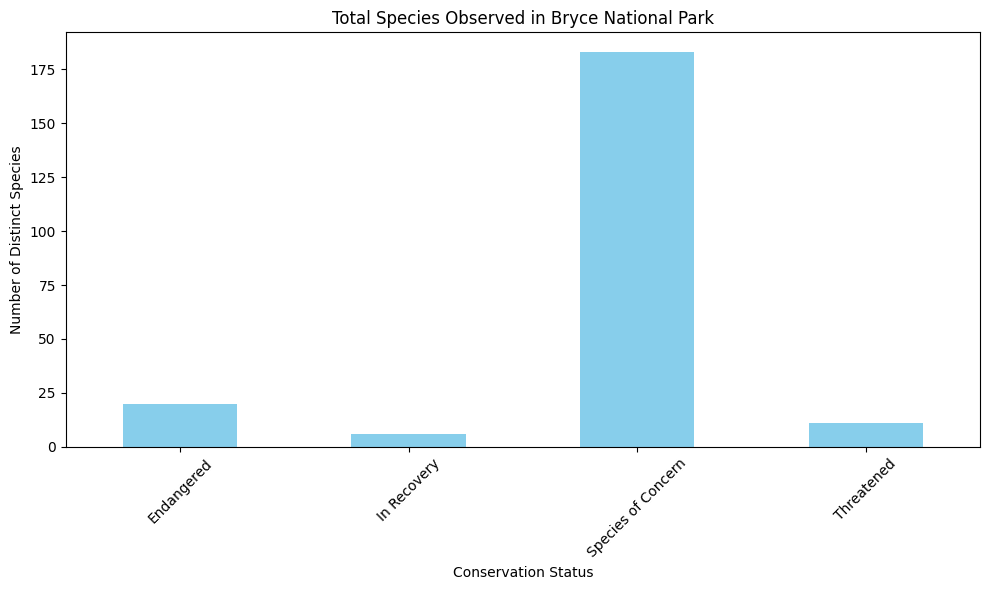

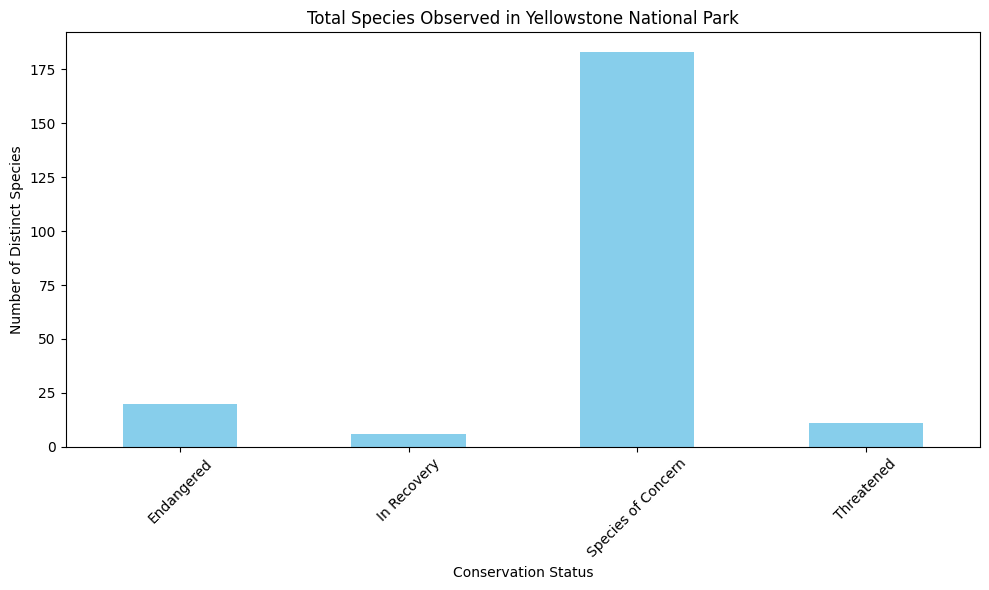

In [24]:
# Loop through each park and create a separate plot
for park in unique_parks:
    # Filter data for the current park
    park_data = species_status_count.loc[park]

    # Create a plot for the current park
    plt.figure(figsize=(10, 6))
    park_data.plot(kind='bar', color='skyblue')  # Choose a color or remove this parameter
    plt.title(f'Total Species Observed in {park}')
    plt.xlabel('Conservation Status')
    plt.ylabel('Number of Distinct Species')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [25]:
merged_df.groupby(['category', 'conservation_status'])['category'].count()

category           conservation_status
Amphibian          Endangered               4
                   Species of Concern      16
                   Threatened               8
Bird               Endangered              16
                   In Recovery             12
                   Species of Concern     320
Fish               Endangered              12
                   Species of Concern      16
                   Threatened              20
Mammal             Endangered              44
                   In Recovery             12
                   Species of Concern     168
                   Threatened               8
Nonvascular Plant  Species of Concern      20
Reptile            Species of Concern      20
Vascular Plant     Endangered               4
                   Species of Concern     172
                   Threatened               8
Name: category, dtype: int64

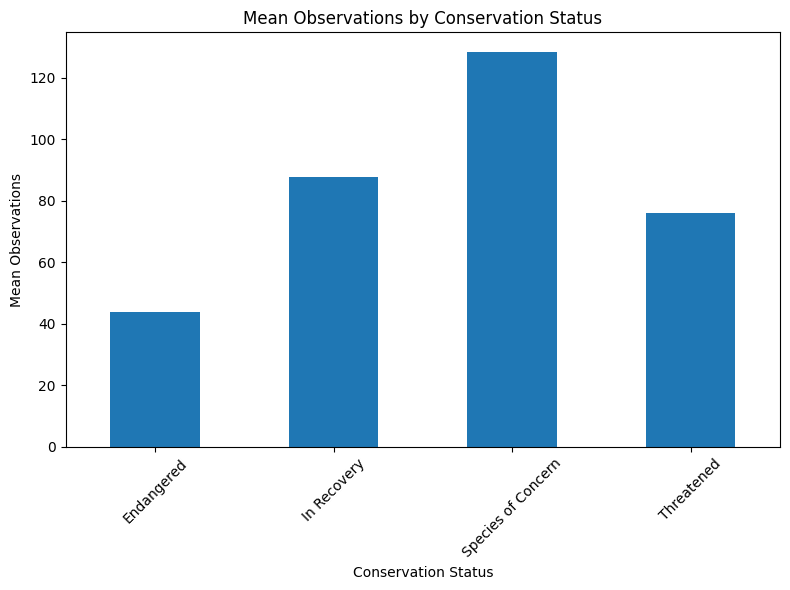

In [26]:
# Calculate the mean observations for each conservation status
mean_observations = merged_df.groupby('conservation_status')['observations'].mean()

# Create a bar plot of mean observations by conservation status
plt.figure(figsize=(8, 6))
mean_observations.plot(kind='bar')
plt.xlabel('Conservation Status')
plt.ylabel('Mean Observations')
plt.title('Mean Observations by Conservation Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

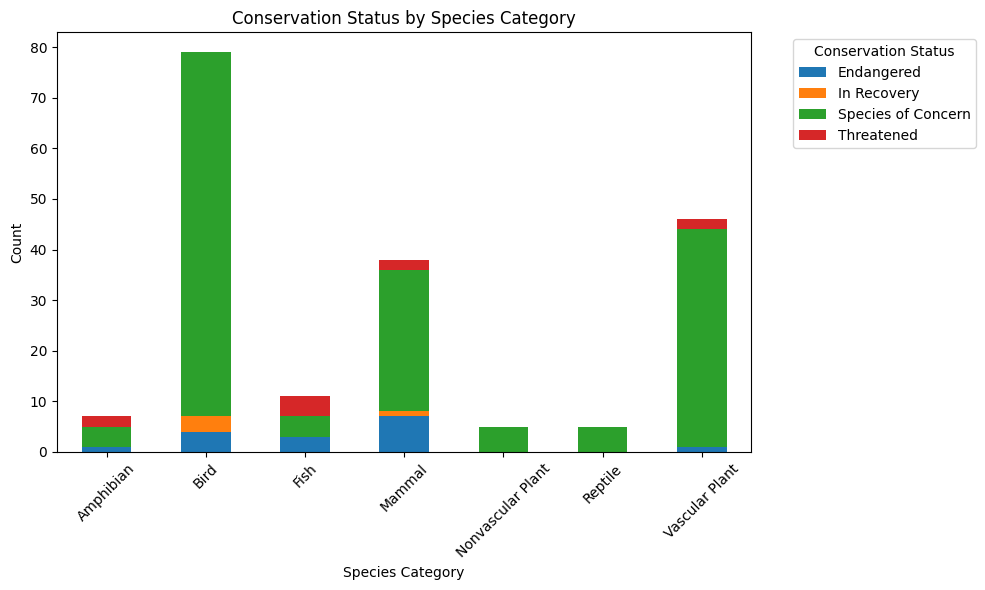

In [27]:
# Create a contingency table of category vs. conservation_status
contingency_table = pd.crosstab(species_info['category'], species_info['conservation_status'])

# Create a stacked bar plot of conservation status by category
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Species Category')
plt.ylabel('Count')
plt.title('Conservation Status by Species Category')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import chi2_contingency

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

Chi-square test results:
Chi-square statistic: 53.92
p-value: 0.0000


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare the data
X = merged_df[['category', 'observations']]  # Features
y_endangered = merged_df['conservation_status'] == 'Endangered'  # Target variable

# Convert categorical variable to dummy variables
X = pd.get_dummies(X, columns=['category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_endangered, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      5104
        True       0.67      0.12      0.20        17

    accuracy                           1.00      5121
   macro avg       0.83      0.56      0.60      5121
weighted avg       1.00      1.00      1.00      5121



/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between number of observations and endangered status: nan


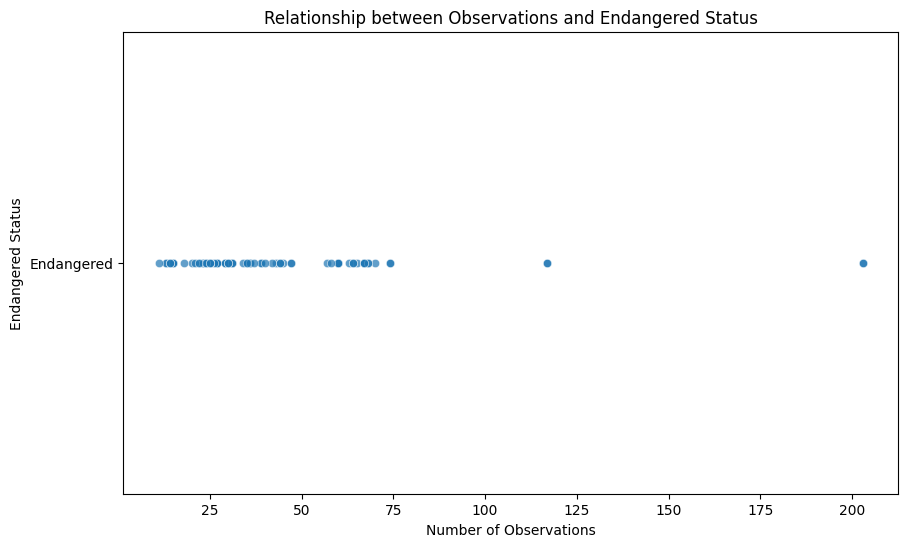

In [32]:
# Filter the merged DataFrame to include only endangered species
endangered_species = merged_df[merged_df['conservation_status'] == 'Endangered']

# Calculate the correlation between the number of observations and the endangered status
correlation = endangered_species['observations'].corr(endangered_species['conservation_status'].apply(lambda x: 1 if x == 'Endangered' else 0))

print(f"Correlation between number of observations and endangered status: {correlation:.2f}")

# Create a scatter plot of observations vs. endangered status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=endangered_species, x='observations', y='conservation_status', alpha=0.7)
plt.xlabel('Number of Observations')
plt.ylabel('Endangered Status')
plt.title('Relationship between Observations and Endangered Status')
plt.show()

# Summary of Findings:

Throughout our analysis of the biodiversity data, we have uncovered several interesting insights:

### Distribution of Observations by National Park:

The bar plot of total observations by national park revealed that some parks, such as Yellowstone National Park and Great Smoky Mountains National Park, had significantly higher numbers of recorded observations compared to others.
This suggests that these parks may have higher levels of biodiversity or more intensive monitoring efforts.


### Conservation Status Distribution:

The pie chart of conservation status proportions showed that the majority of observed species had no specific conservation status recorded.
However, a significant portion of species were classified as "Species of Concern," indicating potential vulnerability or declining populations.
A smaller percentage of species were identified as "Endangered" or "Threatened," highlighting the critical need for conservation efforts targeting these species.


### Conservation Status by Species Category:

The stacked bar plot of conservation status by species category revealed variations in the distribution of conservation statuses across different taxonomic groups.
Some categories, such as Birds, had a higher proportion of species classified as "Species of Concern" compared to other categories.
This suggests that certain taxonomic groups may face greater conservation challenges and require targeted efforts to protect their populations.


### Mean Observations by Conservation Status:

The bar plot of mean observations by conservation status showed differences in the average number of observations across conservation status categories.
Species classified as "Endangered" or "Threatened" tended to have lower mean observations compared to species with no specific conservation status.
This could indicate that endangered and threatened species are less frequently observed, possibly due to their rarity or challenges in detecting them.



# Conclusions:

Based on our analysis, we can draw the following conclusions:

### Biodiversity Monitoring Efforts:

The variation in the number of observations across different national parks suggests that there may be differences in biodiversity monitoring efforts or the abundance and diversity of species present in each park.
Parks with higher numbers of observations, such as Yellowstone and Great Smoky Mountains, could serve as models for effective biodiversity monitoring practices.


### Conservation Priorities:

The presence of species classified as "Endangered," "Threatened," or "Species of Concern" highlights the need for targeted conservation efforts to protect these vulnerable populations.
Particular attention should be given to taxonomic groups that have a higher proportion of species with critical conservation statuses, such as Birds, to ensure their long-term survival.


### Species Observation Patterns:

The lower mean observations for endangered and threatened species compared to species with no specific conservation status suggests potential challenges in detecting and monitoring these species.
This emphasizes the importance of developing and implementing effective monitoring strategies to track the populations of rare and threatened species accurately.



# Recommendations for Conservationists:

Based on our findings and conclusions, we propose the following recommendations for conservationists:

Prioritize conservation efforts for species classified as "Endangered," "Threatened," or "Species of Concern," with a focus on taxonomic groups that have a higher proportion of these conservation statuses.

Collaborate with national parks that have successful biodiversity monitoring programs, such as Yellowstone and Great Smoky Mountains, to exchange knowledge and best practices for effective species monitoring and conservation.
Develop and implement targeted monitoring strategies for rare and threatened species to improve the accuracy and reliability of population assessments and inform conservation decision-making.

Conduct further research to understand the factors contributing to the variation in species observations across parks and conservation status categories, such as habitat preferences, detection probabilities, and monitoring methodologies.

Engage with local communities, stakeholders, and the public to raise awareness about the importance of biodiversity conservation and encourage participation in monitoring and protection efforts.

In [ ]:
# y_threatened = merged_df['conservation_status'] == 'Threatened'  # Target variable

# # Split the data into training and testing sets
# X_train_threatened, X_test_threatened, y_train_threatened, y_test_threatened = train_test_split(X, y_threatened, test_size=0.2, random_state=42)

# # Create and train the logistic regression model
# model = LogisticRegression()
# model.fit(X_train_threatened, y_train_threatened)

# # Make predictions on the test set
# y_pred_threatened = model.predict(X_test_threatened)

# # Print the classification report
# print("Logistic Regression Results:")
# print(classification_report(y_test_threatened, y_pred_threatened))





# y_concern = merged_df['conservation_status'] == 'Species of Concern'  # Target variable

# # Split the data into training and testing sets
# X_train_concern, X_test_concern, y_train_concern, y_test_concern = train_test_split(X, y_concern, test_size=0.2, random_state=42)

# # Create and train the logistic regression model
# model = LogisticRegression()
# model.fit(X_train_concern, y_train_concern)

# # Make predictions on the test set
# y_pred_concern = model.predict(X_test_concern)

# # Print the classification report
# print("Logistic Regression Results:")
# print(classification_report(y_test_concern, y_pred_concern))